# Performance Comparison

This notebook is to compare the kmeans between my implemetation and Scikit-learn.

In [1]:
import pandas as pd
df = pd.read_csv('historical-weather.csv')

## Extract tmperature and relative humidity

I want to find out the relationship between air temerature and relative humidity. So here I need to extract them from the dataframe

<AxesSubplot:xlabel='air_temp', ylabel='relative_humidity'>

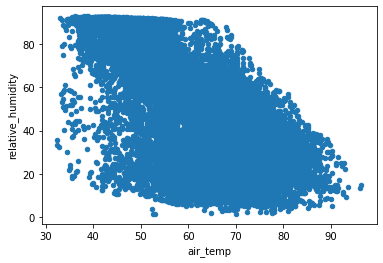

In [2]:
temp_humidity_df = df[['air_temp', 'relative_humidity']].dropna()
temp_humidity_df.plot(x='air_temp', y='relative_humidity', kind='scatter')

## My KMeans

In [3]:
X = temp_humidity_df.to_numpy() # For sklearn.KMeans
input_X = X.tolist() # For My KMeans

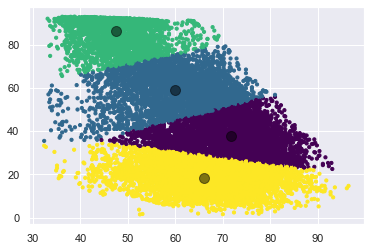

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from kmeans import KMeans as MyKMeans

mykmean = MyKMeans(k=4, max_iterations=100)
(groups, centroids) = mykmean.fit_extended(input_X, False)

centers = np.array(centroids)
group =  np.array(groups)

plt.scatter(X[:, 0], X[:, 1], c=group, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

## Sklearn - KMeans

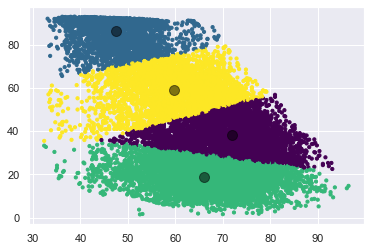

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
clustering = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clustering, s=10, cmap='viridis')
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)